In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
print(wood.head())
print(steel.head())

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  
   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, 

In [57]:
# Function to plot rankings over time for a single roller coaster:
def plot_coaster_ranking(name, park, rankings_df):
  coaster_rankings = rankings_df[(rankings_df['Name'] == name) & (rankings_df['Park'] == park)]
  fig, ax = plt.subplots()
  ax.plot(coaster_rankings['Year of Rank'],coaster_rankings['Rank'], color = 'darkcyan')
  ax.set_yticks(coaster_rankings['Rank'].values)
  ax.set_xticks(coaster_rankings['Year of Rank'].values)
  ax.invert_yaxis()
  plt.title("{} Rankings".format(name))
  plt.xlabel('Year')
  plt.ylabel('Ranking')
  plt.show()

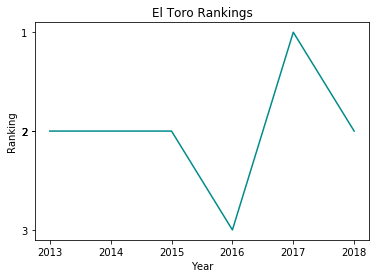

<Figure size 432x288 with 0 Axes>

In [58]:
# Test the coaster ranking function:
plot_coaster_ranking('El Toro', 'Six Flags Great Adventure', wood)
plt.clf()

In [59]:
# Function to compare ranking of two roller coasters over time:
def plot_two_coaster_rankings(name1, park1, name2, park2, rankings_df):
  coaster_1_rankings = rankings_df[(rankings_df['Name'] == name1) & (rankings_df['Park'] == park1)]
  coaster_2_rankings = rankings_df[(rankings_df['Name'] == name2) & (rankings_df['Park'] == park2)]
  fig, ax = plt.subplots()
  ax.plot(coaster_1_rankings['Year of Rank'],coaster_1_rankings['Rank'], color = 'cyan', label = name1)
  ax.plot(coaster_2_rankings['Year of Rank'],coaster_2_rankings['Rank'], color = 'yellowgreen', label = name2)
  ax.invert_yaxis()
  plt.title("Rankings of {} vs. {}".format(name1, name2))
  plt.xlabel('Year')
  plt.ylabel('Ranking')
  plt.legend()
  plt.show()

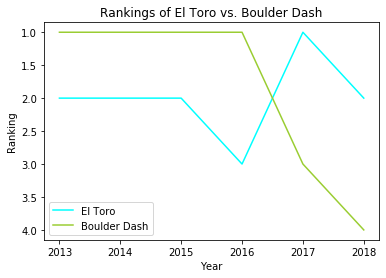

<Figure size 432x288 with 0 Axes>

In [60]:
# Test the roller coaster comparison function:
plot_two_coaster_rankings('El Toro', 'Six Flags Great Adventure', 'Boulder Dash', 'Lake Compounce', wood)
plt.clf()

In [33]:
# Function to plot ranking of the top n ranked roller coasters over time:
def plot_top_n(rankings_df, n):
  top_n = rankings_df[rankings_df['Rank'] <= n]
  fig, ax = plt.subplots()
  for coaster in set(top_n['Name']):
    coaster_rankings = top_n[top_n['Name'] == coaster]
    ax.plot(coaster_rankings['Year of Rank'], coaster_rankings['Rank'], label=coaster)
  ax.set_yticks([i for i in range(1,6)])
  ax.invert_yaxis()
  plt.title("Top 10 Rankings")
  plt.xlabel('Year')
  plt.ylabel('Ranking')
  plt.legend(loc = 'upper center', bbox_to_anchor=(1.3, 1))
  plt.show()

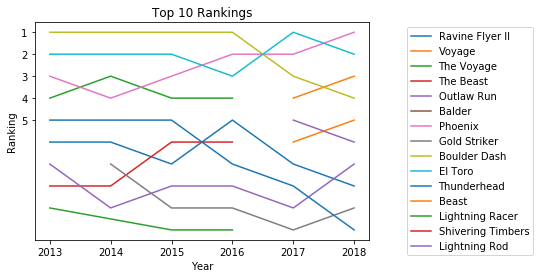

<Figure size 432x288 with 0 Axes>

In [34]:
# Test the function to plot the top n ranked roller coasters:
plot_top_n(wood, 10)
plt.clf()

In [30]:
# Load roller coaster data:
roller_coasters = pd.read_csv('roller_coasters.csv')
print(roller_coasters.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


In [61]:
# Function to plot a histogram of any numeric column of the roller coaster dataframe:
def plot_histogram(coaster_df, column_name):
  plt.hist(coaster_df[column_name].dropna(), color = 'turquoise')
  plt.title('Histogram of Roller Coaster ' + column_name.capitalize())
  plt.xlabel(column_name.capitalize())
  plt.ylabel('Count')
  plt.show()

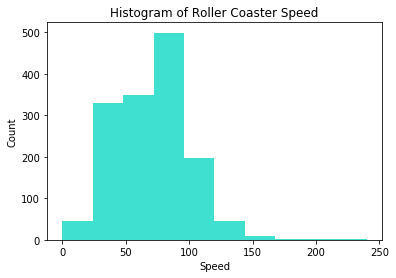

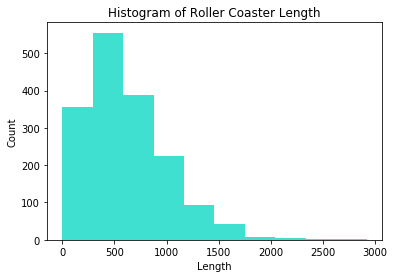

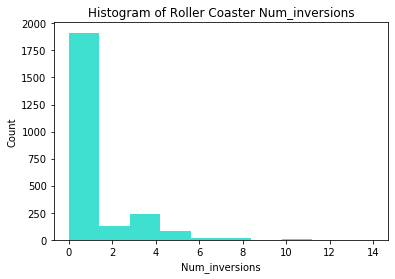

<Figure size 432x288 with 0 Axes>

In [62]:
# Test the function to plot a histogram of any numeric column:
plot_histogram(roller_coasters, 'speed')
plt.clf()

plot_histogram(roller_coasters, 'length')
plt.clf()

plot_histogram(roller_coasters, 'num_inversions')
plt.clf()

In [77]:
# Function to plot histogram of height values:
def plot_height_histogram(coaster_df):
  heights = coaster_df[coaster_df['height'] <= 140]['height'].dropna()
  plt.hist(heights, color = 'magenta')
  plt.title('Histogram of Roller Coaster Height')
  plt.xlabel('Height')
  plt.ylabel('Count')
  plt.show()

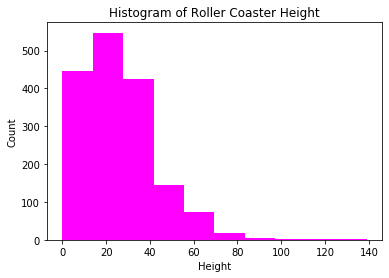

<Figure size 432x288 with 0 Axes>

In [78]:
# Test function to plot histogram of height:
plot_height_histogram(roller_coasters)
plt.clf()

In [115]:
# Function to create a bar chart of the number of inversions for each roller coaster at an amusement park:
def plot_inversions(coaster_df, park_name):
  park_coasters = coaster_df[coaster_df['park'] == park_name]
  park_coasters = park_coasters.sort_values('num_inversions', ascending=False)
  coaster_names = park_coasters['name']
  number_inversions = park_coasters['num_inversions']
  ax = plt.subplot()
  plt.bar(range(len(number_inversions)),number_inversions, color = 'navy')
  ax.set_xticks(range(len(coaster_names)))
  ax.set_xticklabels(coaster_names,rotation=90)
  plt.title('Number of Inversions Per Coaster at {}'.format(park_name))
  plt.xlabel('Roller Coaster')
  plt.ylabel('Number of Inversions')
  plt.show()

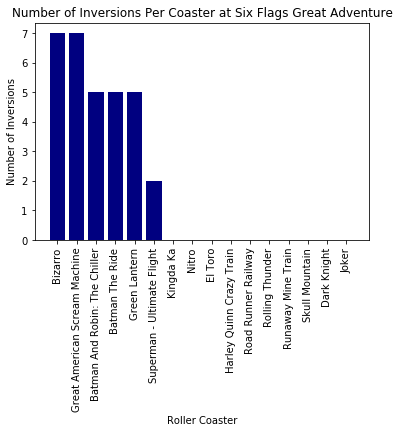

<Figure size 432x288 with 0 Axes>

In [116]:
# Test the function to create a bar chart of inversions:
plot_inversions(roller_coasters, 'Six Flags Great Adventure')
plt.clf()

In [111]:
# Function to create pie chart that compares the number of operating roller coasters to the number of closed roller coasters:
def pie_status(coaster_df):
  operating = coaster_df[coaster_df['status'] == 'status.operating']
  closed = coaster_df[coaster_df['status'] == 'status.closed.definitely']
  num_operating = len(operating)
  num_closed = len(closed)
  status_counts = [num_operating, num_closed]
  plt.pie(status_counts,autopct='%0.1f%%',labels=['Operating','Closed'], colors = ['pink', 'purple'])
  plt.axis('equal')
  plt.show()

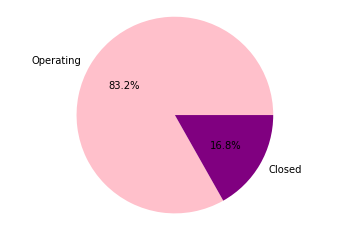

<Figure size 432x288 with 0 Axes>

In [112]:
# Test the function to create a pie chart:
pie_status(roller_coasters)
plt.clf()

In [109]:
def plot_scatter(coaster_df, column_x, column_y):
  plt.scatter(coaster_df[column_x],coaster_df[column_y], color = 'violet')
  plt.title('Scatter Plot of {} vs. {}'.format(column_y,column_x))
  plt.xlabel(column_x)
  plt.ylabel(column_y)
  plt.show()

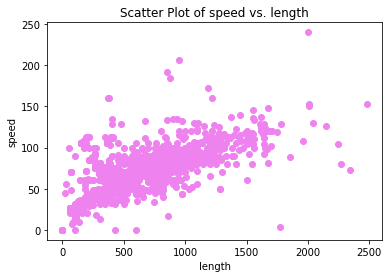

<Figure size 432x288 with 0 Axes>

In [110]:
# Test the functino to create a scatter plot:
plot_scatter(roller_coasters, 'length', 'speed')
plt.clf()

In [127]:
# Function to plot scatter of speed vs. height:
def height_speed(coaster_df):
  coaster_df = coaster_df[coaster_df['height'] < 140]
  plt.scatter(coaster_df['height'],coaster_df['speed'], color = 'orange')
  plt.title('Scatter Plot of Speed vs. Height')
  plt.xlabel('Height')
  plt.ylabel('Speed')
  plt.show()

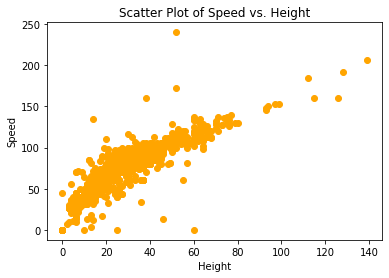

In [128]:
# Test function of speed vs. height:
height_speed(roller_coasters)
plt.clf()

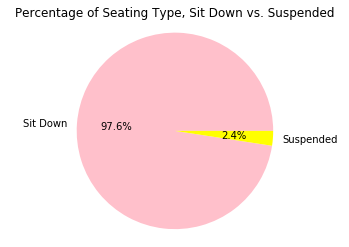

In [139]:
# What roller coaster seating type is most popular?
def seating_type(coaster_df):
  sit_down = coaster_df[coaster_df['seating_type'] == 'Sit Down']
  suspended = coaster_df[coaster_df['seating_type'] == 'Suspended']
  num_sit_down = len(sit_down)
  num_suspended = len(suspended)
  seating_counts = [num_sit_down, num_suspended]
  plt.pie(seating_counts,autopct='%0.1f%%',labels=['Sit Down','Suspended'], colors = ['pink', 'yellow'])
  plt.title('Percentage of Seating Type, Sit Down vs. Suspended')
  plt.axis('equal')
  plt.show()

seating_type(roller_coasters)